## Feature Engineering

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('data/RealStateDataCleaned.csv')

In [4]:
df= df[['City', 'State', 'Country', 'PropertyType', 'SubArea', 'CompanyName', 'TownshipSocietyName', 'Description', 'ClubHouse',
        'School/UniversityInTownship', 'HospitalInTownShip', 'MallInTownShip', 'ParkJoggingTrack','SwimmingPool', 'Gym',
        'PropertyAreainSqFt', 'PriceInLakhs']]

In [5]:
df.head()

,City,State,Country,PropertyType,SubArea,CompanyName,TownshipSocietyName,Description,ClubHouse,School/UniversityInTownship,HospitalInTownShip,MallInTownShip,ParkJoggingTrack,SwimmingPool,Gym,PropertyAreainSqFt,PriceInLakhs
0,Pune,Maharashtra,India,1.0,Bavdhan,Shapoorji paloonji,Vanaha,Shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,Pune,Maharashtra,India,2.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,Pune,Maharashtra,India,2.0,Mahalunge,Godrej properties,Godrej hills retreat,The area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [6]:
df.shape

(199, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         199 non-null    object 
 1   State                        199 non-null    object 
 2   Country                      199 non-null    object 
 3   PropertyType                 199 non-null    float64
 4   SubArea                      199 non-null    object 
 5   CompanyName                  199 non-null    object 
 6   TownshipSocietyName          199 non-null    object 
 7   Description                  199 non-null    object 
 8   ClubHouse                    199 non-null    int64  
 9   School/UniversityInTownship  199 non-null    int64  
 10  HospitalInTownShip           199 non-null    int64  
 11  MallInTownShip               199 non-null    int64  
 12  ParkJoggingTrack             199 non-null    int64  
 13  SwimmingPool        

In [8]:
df.describe()

,PropertyType,ClubHouse,School/UniversityInTownship,HospitalInTownShip,MallInTownShip,ParkJoggingTrack,SwimmingPool,Gym,PropertyAreainSqFt,PriceInLakhs
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2.359296,0.738693,0.030151,0.030151,0.030151,0.979899,0.633166,0.809045,874.669347,84.213065
std,0.833516,0.440455,0.171433,0.171433,0.171433,0.140698,0.483156,0.394045,330.224705,44.552319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,13.190000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,670.000000,51.500000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,796.000000,70.000000
75%,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1035.000000,99.435000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1671.800000,190.300000


## I. Feature Construction

#### Average price by sub-area:

In [9]:
temp1 = df.groupby('SubArea')['PriceInLakhs'].mean().rename_axis('SubArea').reset_index(name='MeanPriceBySubArea_InLakhs').sort_values(by='MeanPriceBySubArea_InLakhs',ascending=False)
temp1

,SubArea,MeanPriceBySubArea_InLakhs
11,Kayani nagar,190.300000
18,Lonavala,174.650000
24,Nibm,145.575000
17,Koregoan,139.500000
10,Karvanagar,135.800000
2,Baner,132.965000
32,Vimannagar,127.500000
0,Akurdi,109.666667
16,Koregaon park,108.500000
5,Bt kawade rd,106.049000


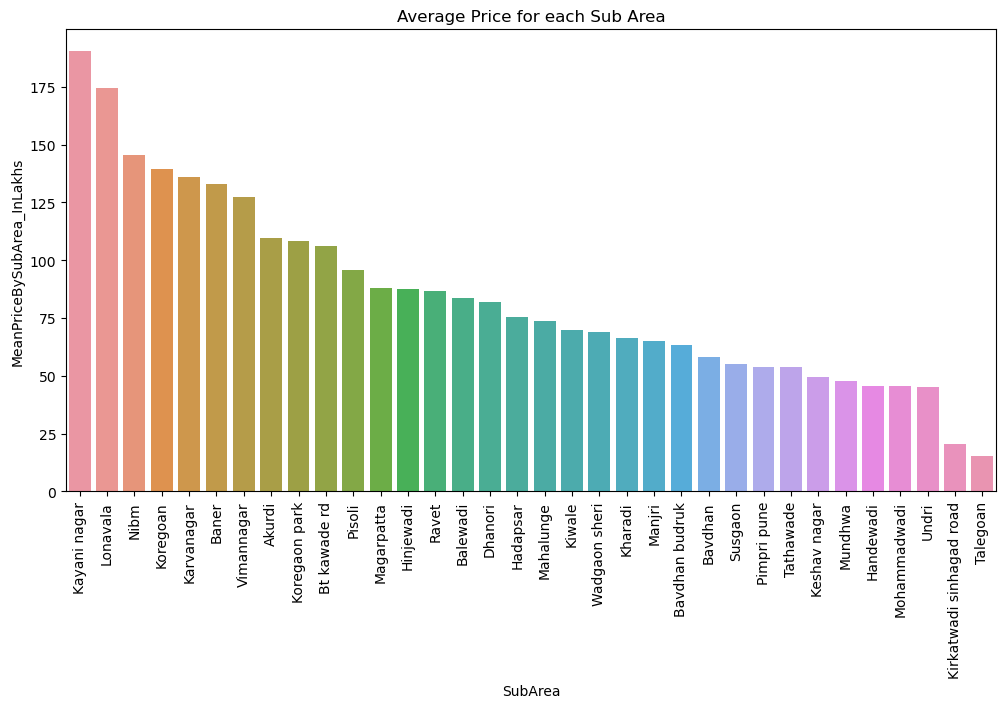

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data = temp1, x= 'SubArea', y = 'MeanPriceBySubArea_InLakhs')
plt.title('Average Price for each Sub Area')
plt.xticks(rotation=90)
plt.show()

In [11]:
Price_by_Sub_Area = df.groupby('SubArea')['PriceInLakhs'].mean().to_dict()

import pickle
filename = 'model/price_by_sub_area.pkl'

with open(filename, 'wb') as f:
    pickle.dump(Price_by_Sub_Area,f)
    
Price_by_Sub_Area

{'Akurdi': 109.66666666666667,
 'Balewadi': 83.75,
 'Baner': 132.96499999999997,
 'Bavdhan': 58.044000000000004,
 'Bavdhan budruk': 63.28333333333333,
 'Bt kawade rd': 106.049,
 'Dhanori': 81.75,
 'Hadapsar': 75.6375,
 'Handewadi': 45.68818181818182,
 'Hinjewadi': 87.52666666666667,
 'Karvanagar': 135.8,
 'Kayani nagar': 190.29999999999987,
 'Keshav nagar': 49.5,
 'Kharadi': 66.310625,
 'Kirkatwadi sinhagad road': 20.666666666666668,
 'Kiwale': 69.665,
 'Koregaon park': 108.5,
 'Koregoan': 139.5,
 'Lonavala': 174.64999999999992,
 'Magarpatta': 88.0,
 'Mahalunge': 73.55555555555556,
 'Manjri': 64.9,
 'Mohammadwadi': 45.6,
 'Mundhwa': 47.804,
 'Nibm': 145.57499999999996,
 'Pimpri pune': 54.0,
 'Pisoli': 95.99833333333329,
 'Ravet': 86.58333333333333,
 'Susgaon': 55.24,
 'Talegoan': 15.239999999999998,
 'Tathawade': 54.0,
 'Undri': 45.3,
 'Vimannagar': 127.5,
 'Wadgaon sheri': 69.12111111111112}

In [12]:
df['PriceBySubArea']= df.groupby('SubArea')['PriceInLakhs'].transform('mean')
df.head(10)

,City,State,Country,PropertyType,SubArea,CompanyName,TownshipSocietyName,Description,ClubHouse,School/UniversityInTownship,HospitalInTownShip,MallInTownShip,ParkJoggingTrack,SwimmingPool,Gym,PropertyAreainSqFt,PriceInLakhs,PriceBySubArea
0,Pune,Maharashtra,India,1.0,Bavdhan,Shapoorji paloonji,Vanaha,Shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0,58.044000
1,Pune,Maharashtra,India,2.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,58.044000
2,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,58.044000
3,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0,58.044000
4,Pune,Maharashtra,India,2.0,Mahalunge,Godrej properties,Godrej hills retreat,The area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0,73.555556
5,Pune,Maharashtra,India,3.0,Mahalunge,Godrej properties,Godrej hills retreat,"Strategically located in mahalunge, pune's qua...",1,1,1,1,1,1,1,975.0,95.0,73.555556
6,Pune,Maharashtra,India,2.0,Balewadi,Anp corp,Anp universe,The project boasts 6 elegant towers of 11 & 12...,1,0,0,0,1,1,1,894.5,75.0,83.750000
7,Pune,Maharashtra,India,3.0,Balewadi,Anp corp,Anp universe,The project boasts 6 elegant towers of 11 & 12...,1,0,0,0,1,1,1,1174.5,100.0,83.750000
8,Pune,Maharashtra,India,2.0,Ravet,Urban space creator,Urban skyline,Urban space creator project has 2 &3 bhk flats...,1,0,0,0,1,1,1,905.0,65.0,86.583333
9,Pune,Maharashtra,India,3.0,Ravet,Urban space creator,Urban skyline,"One of the top residential hubs in pune, it is...",1,0,0,0,1,1,1,1125.0,88.0,86.583333


In [13]:
df[['PriceBySubArea','PriceInLakhs']].corr()

,PriceBySubArea,PriceInLakhs
PriceBySubArea,1.000000,0.753376
PriceInLakhs,0.753376,1.000000


### Analyze Amenities such as from ClubHouse to Gym

In [14]:
amenities_cloumns = df.columns.tolist()[8:15]
amenities_cloumns

['ClubHouse',
 'School/UniversityInTownship',
 'HospitalInTownShip',
 'MallInTownShip',
 'ParkJoggingTrack',
 'SwimmingPool',
 'Gym']

In [15]:
temp_df = df[amenities_cloumns]
temp_df['AmenitiesScore'] = temp_df.sum(axis=1)
temp_df['Price'] = df['PriceInLakhs']
temp_df.head()

,ClubHouse,School/UniversityInTownship,HospitalInTownShip,MallInTownShip,ParkJoggingTrack,SwimmingPool,Gym,AmenitiesScore,Price
0,1,1,1,1,1,1,1,7,39.0
1,1,1,1,1,1,1,1,7,65.0
2,1,1,1,1,1,1,1,7,74.0
3,1,1,1,1,1,1,1,7,89.0
4,1,1,1,1,1,1,1,7,74.0


In [16]:
temp_df.groupby('AmenitiesScore')['Price'].mean().rename('AmenitiesScore').reset_index(name='PricebyAmenitiesScore').sort_values(by='PricebyAmenitiesScore',ascending=False)


,AmenitiesScore,PricebyAmenitiesScore
3,4,97.873505
1,2,81.481034
4,7,72.666667
2,3,68.514348
0,1,62.574286


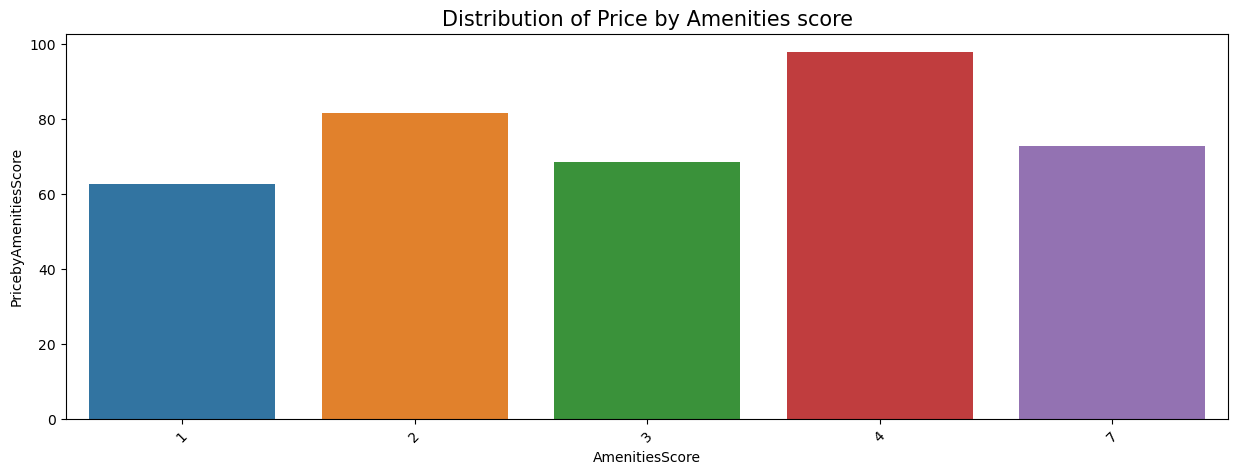

In [17]:
temp2 = temp_df.groupby('AmenitiesScore')['Price'].mean().rename('AmenitiesScore').reset_index(name='PricebyAmenitiesScore').sort_values(by='PricebyAmenitiesScore',ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=temp2['AmenitiesScore'],y=temp2['PricebyAmenitiesScore'])
plt.title("Distribution of Price by Amenities score",size=15)
plt.xticks(rotation=45)
plt.show()

In [18]:
df['AmenitiesScore'] = temp_df['AmenitiesScore']
df['PriceByAmenitiesScore'] = df.groupby('AmenitiesScore')['PriceInLakhs'].transform('mean')
df.shape

(199, 20)

In [19]:
price_by_amenities_score = df.groupby('AmenitiesScore')['PriceInLakhs'].mean().to_dict()

import pickle
filename = 'model/price_by_amenities_score.pkl'
with open(filename,'wb') as f:
    pickle.dump(price_by_amenities_score,f)

price_by_amenities_score

{1: 62.574285714285715,
 2: 81.48103448275862,
 3: 68.51434782608695,
 4: 97.87350515463918,
 7: 72.66666666666667}

In [20]:
df.head(3)

,City,State,Country,PropertyType,SubArea,CompanyName,TownshipSocietyName,Description,ClubHouse,School/UniversityInTownship,HospitalInTownShip,MallInTownShip,ParkJoggingTrack,SwimmingPool,Gym,PropertyAreainSqFt,PriceInLakhs,PriceBySubArea,AmenitiesScore,PriceByAmenitiesScore
0,Pune,Maharashtra,India,1.0,Bavdhan,Shapoorji paloonji,Vanaha,Shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0,58.044,7,72.666667
1,Pune,Maharashtra,India,2.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,58.044,7,72.666667
2,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,Vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,58.044,7,72.666667


## II. Feature Extraction - Text Data Processing

- Finding the most frequently used words from text
- Extracting numbers of Parts of Speech used in Description by making use of word tokenizer, pos_tag and Counter
- Extracting impactful words in the description using Bag of Words and n-grams techinique

In [21]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Setting up stopwords for Text Processing
stopwords_list = set(stopwords.words('english'))

#Custom Stoplist
custome_stopwords= ["i","project","living","home",'apartment',"pune","me","my","myself","we","our","ours","ourselves","you",
                  "you're","you've","you'll","you'd","your","yours","yourself","yourselves","he","him","his","himself","she",
                  "she's","her","hers","herself","it","it's","its","itself","they","them","their","theirs","themselves",
                  "what","which","who","whom","this","that","that'll","these","those","am","is","are","was","were","be","been",
                  "being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because",
                  "as","until","while","of","at","by","for","with","about","against","between","into","through","during",
                  "before","after","above","below","to","from","up","down","in","out","on","off","over","under","again",
                  "further","then","once","here","there","when","where","why","all","any","both","each","few","more","most",
                  "other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will",
                  "just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
                  "aren","couldn","didn","doesn","hadn","hasn","haven","isn","ma","mightn","mustn","needn","shan","shan't",
                  "shouldn","wasn","weren","won","rt","rt","qt","for","the","with","in","of","and","its","it","this","i",
                  "have","has","would","could","you","a","an","be","am","can","edushopper","will","to","on","is","by","ive",
                  "im","your","we","are","at","as","any","ebay","thank","hello","know","need","want","look","hi","sorry",
                  "http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome",
                  "what","well","us"]

stopwords_list.update(custome_stopwords)

In [23]:
# Function to preprocess the text
def text_preprocess(text):
    """
        text: a string    
        return: modified initial string
    """
    text = text.replace("\d+"," ") #removing digits
    text = re.sub(r"(?:\@|https?\://)\S+",'',text) #removing mentions and urls
    text = text.lower()
    text = re.sub('[0-9]+','',text) #removing numeric characters
    text = re.sub('[/(){}\[\]\|@,;!]',' ',text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub('[^0-9a-z #+_]',' ',text) # replace symbols which are in BAD_SYMBOLS_RE from text
    
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    text = text.strip()
    return text

In [24]:
# Cleaning the "text" column in the data frame using the above defined function
df_text = df["Description"].astype(str).apply(text_preprocess)
df_text.head()

0    shapoorji paloonji comunity located suburbs ba...
1    vanaha township located near lonavala hill ran...
2    vanaha society suitable aged group people play...
3    vanaha township offering bhk grand prpoerties ...
4    area hub prestigious schools like bishop high ...
Name: Description, dtype: object

In [25]:
# Preparing a corpus
text = ' '.join(sentences for sentences in df_text)
print("There are {} words in the text.".format(len(text)))

There are 33023 words in the text.


In [47]:
text[:2000]

'shapoorji paloonji comunity located suburbs bavadhan locality situated pleasant environment around bhk property comes swimming pool parking facilty community also comes temples churches near devotional purposes vanaha township located near lonavala hill range offers greenery filled environment friendly community comes bhk furnished affordable price vanaha society suitable aged group people playareafor kids woodland teen park elderly person find serenity community also offers clubhouse gym facilities vanaha township offering bhk grand prpoerties bavdhan area newly launched podium level amenities speak language great design functionality area hub prestigious schools like bishop high school vibgyor intl school boston world school also offers quick access important highways bengaluru solapur mumbai expressway strategically located mahalunge quaint nature loving yet connected suburb godrej hills retreat welcomes experience height high boasts elegant towers stories offering bedroom balewadi

In [27]:
most_frequently_used_words = pd.Series(text.split()).value_counts()[:15]
most_frequently_used_words

amenities      49
lifestyle      41
residential    40
offers         40
bhk            39
homes          32
life           31
every          31
world          30
located        29
quality        28
design         26
high           25
city           25
like           24
dtype: int64

**Four words that occurs the most number of times are**
- amenities      49
- lifestyle      41
- residential    40
- offers         40

We will use the WordCloud package in python to plot the word cloud. Some of the most common parameters in the function is:

* **max_words:** - Used to set the word limit in the word cloud.
* **height:** - Used to set the height of the plot
* **width:** - Used to set the width of the plot
* **collocations:** - Used to set whether to include collocations (bigrams) of two words
* **stopwords:** - Used to remove words from the plot

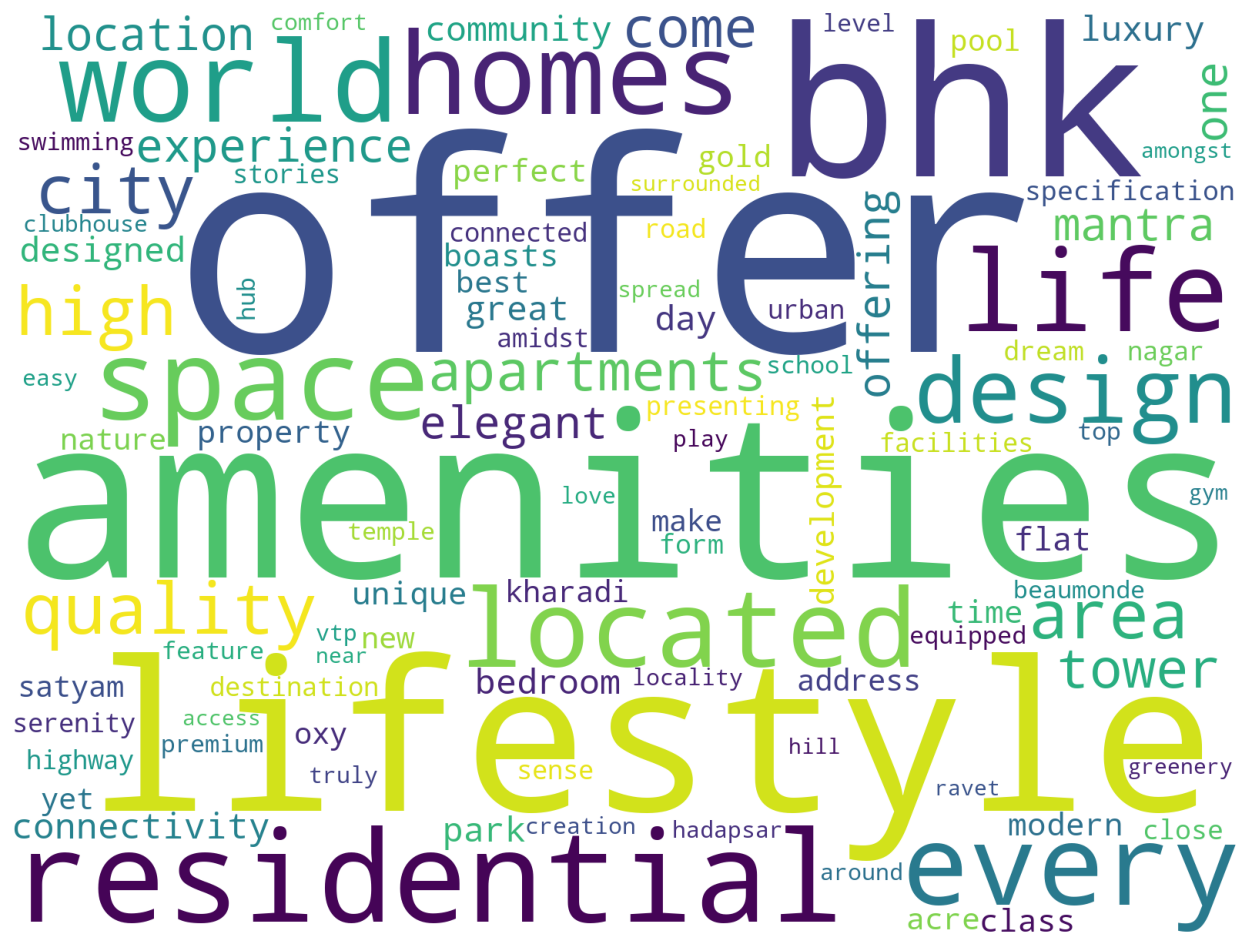

In [28]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud) #interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Extracting Parts of Speech Features

In [29]:
df['Description'] = df['Description'].apply(text_preprocess)

In [30]:
df['Description'][:5]

0    shapoorji paloonji comunity located suburbs ba...
1    vanaha township located near lonavala hill ran...
2    vanaha society suitable aged group people play...
3    vanaha township offering bhk grand prpoerties ...
4    area hub prestigious schools like bishop high ...
Name: Description, dtype: object

In [33]:
from collections import Counter

def get_pos_counter(text,part_of_speech):
    """
    Returns the count for the given parts of speech tag
    
    NN - Noun
    VB - Verb
    JJ - Adjective
    RB - Adverb
    """
    word_list = nltk.word_tokenize(text.lower())
    clean_word_list = [word for word in word_list if word not in stopwords_list]
    text = nltk.Text(clean_word_list)
    tag_pos = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tag_pos)
    return counts[part_of_speech]

In [34]:
df['Noun_Counts'] = df['Description'].apply(lambda x: get_pos_counter(x,'NN'))
df['Verb_Counts'] = df['Description'].apply(lambda x: (get_pos_counter(x,'VB')+get_pos_counter(x,'RB')))
df['Adjective_Counts'] = df['Description'].apply(lambda x: get_pos_counter(x,'JJ'))

In [36]:
print(df.shape)
df.head()

(199, 23)


,City,State,Country,PropertyType,SubArea,CompanyName,TownshipSocietyName,Description,ClubHouse,School/UniversityInTownship,HospitalInTownShip,MallInTownShip,ParkJoggingTrack,SwimmingPool,Gym,PropertyAreainSqFt,PriceInLakhs,PriceBySubArea,AmenitiesScore,PriceByAmenitiesScore,Noun_Counts,Verb_Counts,Adjective_Counts
0,Pune,Maharashtra,India,1.0,Bavdhan,Shapoorji paloonji,Vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,1,1,1,1,1,492.0,39.0,58.044000,7,72.666667,9,1,3
1,Pune,Maharashtra,India,2.0,Bavdhan,Shapoorji paloonji,Vanaha,vanaha township located near lonavala hill ran...,1,1,1,1,1,1,1,774.0,65.0,58.044000,7,72.666667,9,1,3
2,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,vanaha society suitable aged group people play...,1,1,1,1,1,1,1,889.0,74.0,58.044000,7,72.666667,9,1,3
3,Pune,Maharashtra,India,3.0,Bavdhan,Shapoorji paloonji,Vanaha,vanaha township offering bhk grand prpoerties ...,1,1,1,1,1,1,1,1018.0,89.0,58.044000,7,72.666667,8,1,3
4,Pune,Maharashtra,India,2.0,Mahalunge,Godrej properties,Godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,1,1,1,1,1,743.0,74.0,73.555556,7,72.666667,12,1,6


### Bag of Words  and N Gram Extraction

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=5).fit(df['Description'])
X = count_vectorizer.transform(df['Description'])
print(X.shape)
X.toarray()

(199, 5)


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0,

In [40]:
import pickle
fileName = 'model/count_vectorizer.pkl'
with open(fileName,'wb') as f:
    pickle.dump(count_vectorizer,f)

In [42]:
count_vectorizer.get_feature_names_out()

array(['boasts elegant', 'mantra gold', 'offering bedroom',
       'stories offering', 'towers stories'], dtype=object)

In [43]:
ngram_df = pd.DataFrame(X.toarray(),columns=count_vectorizer.get_feature_names_out())
print(ngram_df.shape)
ngram_df.head()

(199, 5)


,boasts elegant,mantra gold,offering bedroom,stories offering,towers stories
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [45]:
# Adding this to the main dataframe
df_final = pd.concat([df.reset_index(drop=True),ngram_df.reset_index(drop=True)],axis=1)
df_final.shape

(199, 28)

In [46]:
# Saving the final dataframe with model ready features as a csv file
df_final.to_csv('data/real_estate_for_mlmodels.csv',index=False)